## MonteCarlo

Apply Monte-Carlo control to Easy21. Initialise the value function to zero.
Use a time-varying scalar step-size of alpha_t = 1/N(s_t, a_t) and an epsilon-greedy exploration strategy with epsilon_t = N_0 / (N_0 + N(s_t)), where N_0 = 100 is a constant, N(s) is the number of times that state s has been visited, and N(s, a) is the number of times that action a has been selected from state s. Feel free to choose an alternative value for N_0, if it helps producing better results.
Plot the optimal value function V\*(s) = max_aQ\*(s, a)using similar axes to the following figure taken from Sutton and Barto\`s Blackjack example

__Value Function__
- Initialise : zero

__step-size__
- alpha_t = 1/N(s_t, a_t)

__epsilon-greedy exploration__
- epsilon_t = N_0/(N_0 + N(s_t)), N_0 = 100 is a constant

N(s): number of times that state __s__ has been visited.  
N(s, a): number of times that action __a__ has been selected from state s.

__Optimal value function__  
V\*(s) = max_aQ\*(s, a) 
  
Plot the optimal value function


In [67]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [29]:

class EasyEnv(object):
    def __init__(self):
        self.lowerbound = 1
        self.upperbound = 21
        # 1 is hit and 0 is stick
        self.actions = [0, 1]
    
    def initGame(self):
        self.playerValue = np.random.randint(1, 11)
        self.dealerValue = np.random.randint(1, 11)
        
    def draw(self):
        card_value = np.random.randint(1, 11)
        
        if round(np.random.rand(), 2) <= 0.3:
            return -card_value
        else:
            return card_value
        
    def get_state(self):
        return self.playerValue, self.dealerValue
    
    def step(self, playerValue, dealerValue, action):
        
        # Hit
        if action == 1:
            playerValue += self.draw()
            
            if playerValue > self.upperbound or playerValue < self.lowerbound:
                reward = -1
                terminated = True
            else:
                reward = 0
                terminated = False
        else:
            # Player Action is Stick. Dealer`s turn.
            while dealerValue < 17:
                dealerValue += self.draw()
                
            if dealerValue > self.upperbound or dealerValue < self.lowerbound or playerValue > dealerValue:
                reward = 1
            elif playerValue == dealerValue:
                reward = 0
            else:
                reward = -1
                
            terminated = True
        
        return playerValue, dealerValue, reward, terminated
    

In [136]:

N_0 = 100
actions = [0, 1] # 0 is Stick, 1 is Hit.
N_s_dict = {} # Number of times that state s has been visited.
N_sa_dict = {} # Number of times that action a has been selected from state s.
Q_sa_dict = {} # Action-State Value
V_s_dict = {} # State Value

   
def calc_epsilon(N_s):
    if N_s not in N_s_dict.keys():
        N_s_dict[N_s] = 0
    epsilon_t = N_0/(N_0 + N_s_dict[N_s])
    return epsilon_t

def calc_alpha(N_sa):
    alpha = 1 / N_sa
    return alpha

def epsilonGreedy(pValue, dValue):
    epsilon = calc_epsilon((pValue, dValue))
    if (pValue, dValue, 0) not in Q_sa_dict.keys():
        Q_sa_dict[(pValue, dValue, 0)] = 0
    if (pValue, dValue, 1) not in Q_sa_dict.keys():
        Q_sa_dict[(pValue, dValue, 1)] = 0
  
    max_action = np.argmax([Q_sa_dict[pValue, dValue, act] for act in actions])
    
    #RandomPolicy
    if epsilon is 1:
        return np.random.choice(actions)
    
    # Exploitation
    if round(np.random.rand(), 2) > epsilon:
        return max_action
    # Explore
    else:
        if max_action:
            return 0
        else:
            return 1

env = EasyEnv()
episodes = 3000000

for episode in range(episodes):
    terminated = False
    H = []

    env.initGame()
    pValue, dValue = env.get_state()
    reward = 0

    while not terminated:

        if (pValue, dValue) not in N_s_dict.keys():
            N_s_dict[(pValue, dValue)] = 0
        N_s_dict[(pValue, dValue)] += 1

        action = epsilonGreedy(pValue, dValue)
        if (pValue, dValue, action) not in N_sa_dict.keys():
            N_sa_dict[(pValue, dValue, action)] = 1
        else:
            N_sa_dict[(pValue, dValue, action)] += 1

        pPrime, dPrime, reward, terminated = env.step(pValue, dValue, action)

        H.append([pValue, dValue, action, reward])

        pValue, dValue = pPrime, dPrime

    G = reward

    for (pValue, dValue, action, _) in H:
        alpha = calc_alpha(N_sa_dict[(pValue, dValue, action)])
        if (pValue, dValue, action) not in Q_sa_dict.keys():
            Q_sa_dict[(pValue, dValue, action)] = 0
        Q_sa_dict[(pValue, dValue, action)] += alpha*(G - Q_sa_dict[(pValue, dValue, action)])

In [137]:
N_s_dict

{(1, 1): 32415,
 (1, 2): 32425,
 (1, 3): 30364,
 (1, 4): 32129,
 (1, 5): 31270,
 (1, 6): 31752,
 (1, 7): 30392,
 (1, 8): 32223,
 (1, 9): 39777,
 (1, 10): 31509,
 (2, 1): 32482,
 (2, 2): 32234,
 (2, 3): 30374,
 (2, 4): 32034,
 (2, 5): 31240,
 (2, 6): 31892,
 (2, 7): 29847,
 (2, 8): 32295,
 (2, 9): 40049,
 (2, 10): 31318,
 (3, 1): 32678,
 (3, 2): 32641,
 (3, 3): 30633,
 (3, 4): 32631,
 (3, 5): 31709,
 (3, 6): 31617,
 (3, 7): 30135,
 (3, 8): 32515,
 (3, 9): 42905,
 (3, 10): 31767,
 (4, 1): 32948,
 (4, 2): 32764,
 (4, 3): 30173,
 (4, 4): 32369,
 (4, 5): 31411,
 (4, 6): 32289,
 (4, 7): 30240,
 (4, 8): 32797,
 (4, 9): 43369,
 (4, 10): 31877,
 (5, 1): 33013,
 (5, 2): 32972,
 (5, 3): 30337,
 (5, 4): 32988,
 (5, 5): 31982,
 (5, 6): 32229,
 (5, 7): 30275,
 (5, 8): 33145,
 (5, 9): 43004,
 (5, 10): 31857,
 (6, 1): 33498,
 (6, 2): 33143,
 (6, 3): 30716,
 (6, 4): 32809,
 (6, 5): 31977,
 (6, 6): 32217,
 (6, 7): 30200,
 (6, 8): 33074,
 (6, 9): 45208,
 (6, 10): 31568,
 (7, 1): 33315,
 (7, 2): 33378,
 (

In [138]:
N_sa_dict

{(1, 1, 0): 31834,
 (1, 1, 1): 581,
 (1, 2, 0): 31816,
 (1, 2, 1): 609,
 (1, 3, 0): 29752,
 (1, 3, 1): 612,
 (1, 4, 0): 31548,
 (1, 4, 1): 581,
 (1, 5, 0): 30683,
 (1, 5, 1): 587,
 (1, 6, 0): 31176,
 (1, 6, 1): 576,
 (1, 7, 0): 29848,
 (1, 7, 1): 544,
 (1, 8, 0): 31664,
 (1, 8, 1): 559,
 (1, 9, 0): 39180,
 (1, 9, 1): 597,
 (1, 10, 0): 30950,
 (1, 10, 1): 559,
 (2, 1, 0): 31917,
 (2, 1, 1): 565,
 (2, 2, 0): 31659,
 (2, 2, 1): 575,
 (2, 3, 0): 29795,
 (2, 3, 1): 579,
 (2, 4, 0): 31417,
 (2, 4, 1): 617,
 (2, 5, 0): 30658,
 (2, 5, 1): 582,
 (2, 6, 0): 31312,
 (2, 6, 1): 580,
 (2, 7, 0): 29293,
 (2, 7, 1): 554,
 (2, 8, 0): 31719,
 (2, 8, 1): 576,
 (2, 9, 0): 12195,
 (2, 9, 1): 27854,
 (2, 10, 0): 30771,
 (2, 10, 1): 547,
 (3, 1, 0): 32101,
 (3, 1, 1): 577,
 (3, 2, 0): 32075,
 (3, 2, 1): 566,
 (3, 3, 0): 30045,
 (3, 3, 1): 588,
 (3, 4, 0): 32034,
 (3, 4, 1): 597,
 (3, 5, 0): 31142,
 (3, 5, 1): 567,
 (3, 6, 0): 31048,
 (3, 6, 1): 569,
 (3, 7, 0): 29572,
 (3, 7, 1): 563,
 (3, 8, 0): 31946,
 (3

In [139]:
Q_sa_dict

{(1, 1, 0): -0.5229628698875416,
 (1, 1, 1): -0.5886402753872633,
 (1, 2, 0): -0.5259617802363571,
 (1, 2, 1): -0.6288998357963872,
 (1, 3, 0): -0.5150578112395767,
 (1, 3, 1): -0.7254544379111851,
 (1, 4, 0): -0.5021554456700891,
 (1, 4, 1): -0.6798623063683308,
 (1, 5, 0): -0.484470227813447,
 (1, 5, 1): -0.7052810902896083,
 (1, 6, 0): -0.46112394149345687,
 (1, 6, 1): -0.5902632114160439,
 (1, 7, 0): -0.49370142053069005,
 (1, 7, 1): -0.6654297942087052,
 (1, 8, 0): -0.5342344618494169,
 (1, 8, 1): -0.6852136203318538,
 (1, 9, 0): -0.556457376212346,
 (1, 9, 1): -0.6332608537682849,
 (1, 10, 0): -0.5902423263327974,
 (1, 10, 1): -0.6654740608228982,
 (2, 1, 0): -0.5228874894257063,
 (2, 1, 1): -0.6672187570525574,
 (2, 2, 0): -0.5182412584099305,
 (2, 2, 1): -0.6695652173913049,
 (2, 3, 0): -0.5119986574928675,
 (2, 3, 1): -0.6390284192592942,
 (2, 4, 0): -0.49791514148391086,
 (2, 4, 1): -0.6968697365494005,
 (2, 5, 0): -0.4867245091003983,
 (2, 5, 1): -0.5927753304865045,
 (2, 6,

In [140]:
for i in range(1, 22):
    for j in range(1, 11):
        if Q_sa_dict[(i, j, 0)] > Q_sa_dict[(i, j, 1)]:
            V_s_dict[(i, j)] = Q_sa_dict[(i, j, 0)]
        else:
            V_s_dict[(i, j)] = Q_sa_dict[(i, j, 1)]


In [141]:
V_s_dict

{(1, 1): -0.5229628698875416,
 (1, 2): -0.5259617802363571,
 (1, 3): -0.5150578112395767,
 (1, 4): -0.5021554456700891,
 (1, 5): -0.484470227813447,
 (1, 6): -0.46112394149345687,
 (1, 7): -0.49370142053069005,
 (1, 8): -0.5342344618494169,
 (1, 9): -0.556457376212346,
 (1, 10): -0.5902423263327974,
 (2, 1): -0.5228874894257063,
 (2, 2): -0.5182412584099305,
 (2, 3): -0.5119986574928675,
 (2, 4): -0.49791514148391086,
 (2, 5): -0.4867245091003983,
 (2, 6): -0.462250894225857,
 (2, 7): -0.4996756904379869,
 (2, 8): -0.539771115104517,
 (2, 9): -0.528002509313637,
 (2, 10): -0.5891586233791597,
 (3, 1): -0.5218840534562756,
 (3, 2): -0.5289166017147349,
 (3, 3): -0.5130637377267451,
 (3, 4): -0.5153898982331326,
 (3, 5): -0.4880868280778364,
 (3, 6): -0.44833805720175257,
 (3, 7): -0.4995265791965373,
 (3, 8): -0.5307706755149304,
 (3, 9): -0.5603460502056468,
 (3, 10): -0.590811520840684,
 (4, 1): -0.5221971639531681,
 (4, 2): -0.5277268632141352,
 (4, 3): -0.5177228423999222,
 (4, 4): 

In [142]:
z = []
for k, v in V_s_dict.items():
    z.append(v)

In [143]:
z = np.array(z)

In [118]:
z

array([-4.44444444e-01, -5.73770492e-01, -6.00000000e-01, -3.75000000e-01,
       -2.12121212e-01, -4.76190476e-01, -4.33962264e-01, -5.42857143e-01,
       -5.47169811e-01, -6.07843137e-01, -8.57142857e-02, -3.33333333e-01,
       -5.08771930e-01, -5.09433962e-01, -5.71428571e-01, -3.75000000e-01,
       -5.43859649e-01, -5.08196721e-01, -4.70588235e-01, -6.07142857e-01,
       -4.28571429e-01, -4.40000000e-01, -5.38461538e-01, -5.07692308e-01,
       -5.71428571e-01, -5.52238806e-01, -4.28571429e-01, -4.61538462e-01,
       -6.45201950e-01, -6.12903226e-01, -3.41176471e-01, -6.73469388e-01,
       -4.91525424e-01, -3.60000000e-01, -5.00000000e-01, -4.07407407e-01,
       -5.45454545e-01, -6.00000000e-01, -5.73770492e-01, -3.62318841e-01,
       -4.84848485e-01, -5.08196721e-01, -3.96226415e-01, -5.29411765e-01,
       -4.44444444e-01, -5.76923077e-01, -4.93670886e-01, -6.19047619e-01,
       -6.00000000e-01, -5.08771930e-01, -5.16129032e-01, -4.32835821e-01,
       -6.20088473e-01, -

In [144]:
z = z.reshape(21, 10)

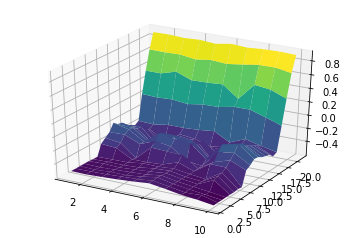

In [145]:
x = np.arange(1, 11)
y = np.arange(1, 22)
xs, ys = np.meshgrid(x, y)
z = np.array(z)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(xs, ys, z, rstride=1, cstride=1, cmap='viridis')
plt.show()
